# HACETTEPE UNIVERSITY DEPARTMENT OF COMPUTER ENGINEERING
# BBM409 Fundamentals of  Machine Learning Laboratory
### Fall 2018 - Assignment III
    NAME AND SURNAME:     Defne Tunçer
    STUDENT ID:           21627686
    EMAIL:                b21627686@cs.hacettepe.edu.tr
    INSTRUCTOR:           Aykut Erdem
    TA:                   Necva Bölücü

## PART I THEORY QUESTIONS
1. What are differences between logistic regression and linear regression?
Linear regression is used to estimate linear relationships between continuous or/and categorical data and a continuous output variable while logistic regression is used to model a binary dependent variable.
2. What are differences between logistic regression and naive bayes methods?
Both algorithms are used for classification problems; logistic regression (discriminative model) makes a prediction for the probability using a direct functional form where as naive bayes (generative model) figures out how the data was generated given the results
3. Which of the following statements are true?
    - A two layer (one input layer, one output layer; no hidden layer) neural network can represent the XOR function. <b>F</b>
    - Any logical function over binary-valued (0 or 1) inputs $x_1andx_2$ can be (approximately) represented using some neural network.<b>T</b>
    - Suppose you have a multi-class classification problem with three classes, trained with a 3 layer network. Let $a_1^{(3)} = (h_Θ(x))_1$ be the activation of the first output unit and similarly $a_2^{(3)} = (h_Θ(x))_2$ and $a_3^{(3)} = (h_Θ(x))_3$. Then for any input x, it must be the case that $a_1^{(3)} + a_2^{(3)} + a_3^{(3)} = 1$.<b>F</b>
    - The activation values of the hidden units in a neural network, with the sigmoid activation function applied at every layer, are always in the range (0, 1).<b>T</b>
4. How to decide the number of hidden layers and nodes in a hidden layer?
Testing.

## PART II: Classification of Flowers using Neural Network
## INTRODUCTION
In this work a neural network is implemented from scratch to classify flowers by their images. Various methods are discussed and compared.

## DATASET
Flowers Recognition dataset [1] contains 4323 images of 5 flowers: `daisy`, `dandelion`, `rose`, `sunflower`, `tulip`.
To load the dataset, above code is provided: <br>
- Dataset is splitted into training set (3600 images) and test set (723 images)<br>
- Every image is represented with [768x1] vector and a label.

In [2]:
import json, os, random
from scipy.misc import imread, imresize
from os import listdir
from os.path import isfile, join
import numpy as np

img_array = []
img_label = []
folders = {"daisy":0, "dandelion":1, "rose":2, "sunflower":3, "tulip":4}
for flower in folders.keys():
    data_path = os.path.join("flowers/",flower)
    onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
    for file in onlyfiles:
        img_file = os.path.join(data_path +"/",file)
        img = imread(img_file,flatten=True)
        img = imresize(img,[32,24])
        img = img.flatten()
        img_array.append(img)
        img_label.append(folders[flower])
img_shuffled = list(zip(img_array, img_label))
random.shuffle(img_shuffled)
img_array, img_label = zip(*img_shuffled)
X_train = np.array(img_array[0:3600], dtype=float)/255
y_train = [arr.reshape(5,1) for arr in np.eye(5)[np.array(img_label[0:3600])]]
train_data = [(x,y) for x,y in zip([arr.reshape(768,1) for arr in X_train], y_train)]
X_test = np.array(img_array[3601:4323], dtype=float)/255
y_test = img_label[3601:4323]
test_data = [(x,y) for x,y in zip([arr.reshape(768,1) for arr in X_test], y_test)]

C:\Users\defne\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
C:\Users\defne\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


In [7]:
X_train = np.array(img_array[0:3600], dtype=float)/255
y_train = img_label[0:3600]
train_data = [(x,y) for x,y in zip([arr.reshape(768,1) for arr in X_train], y_train)]
X_test = np.array(img_array[3601:4323], dtype=float)/255
y_test = img_label[3601:4323]


import sklearn.preprocessing, sklearn.neural_network, sklearn.metrics

scaler = sklearn.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

classifier = sklearn.neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=1).fit(X_train, y_train)
        
print("Training Report: ", classifier.score(X_train,y_train))
print(sklearn.metrics.classification_report(y_train, classifier.predict(X_train)))
print(classifier.predict_proba(X_train))
print()
print("Test Report: ", classifier.score(X_test,y_test))
print(sklearn.metrics.classification_report(y_test, classifier.predict(X_test)))
print(classifier.predict_proba(X_test))

Training Report:  0.82
              precision    recall  f1-score   support

           0       0.90      0.82      0.85       649
           1       0.83      0.80      0.81       876
           2       0.75      0.75      0.75       636
           3       0.70      0.99      0.82       610
           4       0.97      0.78      0.86       829

   micro avg       0.82      0.82      0.82      3600
   macro avg       0.83      0.83      0.82      3600
weighted avg       0.84      0.82      0.82      3600

[[1.46737469e-012 9.96971646e-001 3.02835449e-003 2.12479645e-034
  4.05640115e-027]
 [6.95546296e-003 1.12703271e-001 7.65698559e-002 6.66311118e-001
  1.37460293e-001]
 [7.90955846e-006 7.10595656e-004 2.02127050e-004 7.71869583e-001
  2.27209784e-001]
 ...
 [9.11270416e-036 2.17940527e-010 1.00000000e+000 1.13764907e-061
  5.02100634e-037]
 [8.13726374e-001 1.86273626e-001 3.19006485e-024 3.30527409e-054
  1.26074491e-027]
 [2.95622194e-039 6.99590009e-004 9.99300410e-001 3.688702

## METHODS
<b>In machine learning</b>, model learns a function f such that f(X) maps to y. Put differently, the model learns how to take X (i.e. features, or, more traditionally, independent variable(s)) in order to predict y (the target, response or more traditionally the dependent variable).
### Neural Networks
A type of artificial neuron, called <b>perceptron</b> were developed in the 1950s and 1960s using the biological analogy of neurons either being inactive or active. A perceptron takes several binary inputs, $x_1, x_2, ...$ and produces a single binary output. The <b>weights</b>, $w_1, w_2, ...$ are expressing the importance of the respective inputs to the output. The neuron's output, 0 or 1, is determined by whether the weighted sum $\sum_jw_jx_j$ is less than or greater than some <b>threshold</b> value. <b>Perceptron is a device that makes decisions by weighing up evidence.</b><br><br>
$$\mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.$$
  
#### Activation Functions
Today, the main neuron model used is one called the <b>sigmoid neuron</b>. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output. A sigmoid neuron takes several inputs, $x_1, x_2, ...$ which is between 0 and 1, and produces an output which is also between 0 and 1.

$$ sigmoid(x) = \sigma(x) = \frac{1}{1 + exp(-x)}$$
$$ \frac{\partial}{\partial x}\sigma(x) = \sigma(x)(1-\sigma(x))$$

- <b>Sigmoid function</b> is called <b>activation function</b> and below functions can be used instead.
- <b>Hyperbolic Tangent</b>
$$tanh(x)$$
$$\frac{\partial}{\partial x}tanh(x) = 1-tanh^2(x)$$
- <b>ReLU (Rectified Linear Unit)</b>
$$f(x) = max(x,0)$$
$$\frac{\partial}{\partial x}f(x) = x>0$$
- <b>Softmax(also called multinomial logistic regression, sum of negative log likelihood)</b>
The softmax function squashes the outputs of each unit to be between 0 and 1, just like a sigmoid function. But it also divides each output such that the total sum of the outputs is equal to 1. Softmax function is used as activation function for output layer.
    $$L_i = -log(\frac{e^{s_{y_i}}}{\sum_{j}e^{s_j}})$$
    
While back forwarding, if we use softmax as activation function with cross-entropy cost function, result of their derivative's product is actually becomes predicted value — real value.

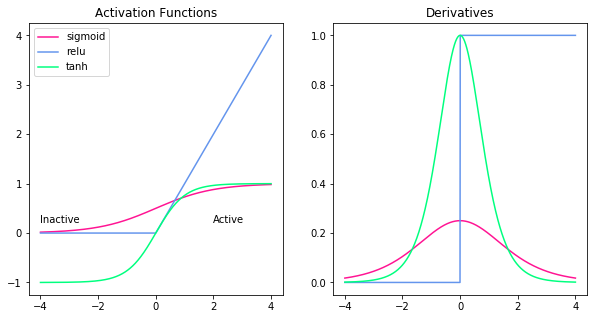

In [4]:
sigmoid = lambda x: 1. / (1. + np.exp(-x))
relu = lambda x: np.maximum(x,0)
tanh = lambda x: np.tanh(x)

sigmoid_prime = lambda x: sigmoid(x)*(1-sigmoid(x))
relu_prime = lambda x: x > 0
tanh_prime = lambda x: 1-tanh(x)*tanh(x)

x = np.linspace(-4,4,1000)
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(x, sigmoid(x), 'deeppink', label='sigmoid')
axs[0].plot(x, relu(x), 'cornflowerblue', label='relu')
axs[0].plot(x, tanh(x), 'springgreen', label='tanh')
axs[0].legend()
axs[0].annotate('Inactive', xy=(-4,0.2))
axs[0].annotate('Active', xy=(2,0.2))
axs[0].set_title("Activation Functions")

axs[1].plot(x, sigmoid_prime(x), 'deeppink', label='sigmoid')
axs[1].plot(x, relu_prime(x), 'cornflowerblue', label='relu')
axs[1].plot(x, tanh_prime(x), 'springgreen', label='tanh')
axs[1].set_title("Derivatives")
plt.show()

#### Cost Functions
Goal in training a neural network is to find weights and biases which minimize the <b>cost function</b>. Cost<b>(also called loss, objective or error)</b> function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

- <b>Mean Squared Error</b>
$$f(x) = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2$$
$$\frac{\partial}{\partial x}f(x) = \sum_{i=1}^N(y_i - \hat{y}_i)$$
- <b>Cross-Entropy</b>
For a Multi-class classification problem, the output will be a probability distribution. Cross-entropy function is able to compute error between two probability distributions, so using cross-entropy as cost function is preferred.
$$f(x) = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^k\hat{y}_ilog(y_i)$$
$$\frac{\partial}{\partial x}f(x) = \sum_{i=1}^N(y_i - \hat{y}_i)$$

#### Gradient Descent
To minimize the cost function(C) <b>gradient descent algorithm</b> is used. The way the gradient descent algorithm works is to repeatedly compute the gradient of cost function ($\nabla C$), and then to move in the opposite direction. Weight are updated according to below rule where $\eta$ is <b>learning rate</b>.
$$w_k \rightarrow w_k' = w_k -\eta\nabla C = w_k -\eta\frac{\partial C}{\partial w_k}$$
$$b_l \rightarrow b_l' = b_l -\eta\nabla C = w_k -\eta\frac{\partial C}{\partial b_l}$$

#### Mini-batch Stochastic Gradient Descent
<b>Loop:</b>
1. Sample a batch of data
2. Forward prop it through the graph, get loss
3. Backprop to calculate the gradients
4. Update the parameters using the gradient

### - Single Layer Neural Network (Perceptron)
This neural network can be mathematically expressed as: $$o_i = w_{ij}x_j + b_i$$

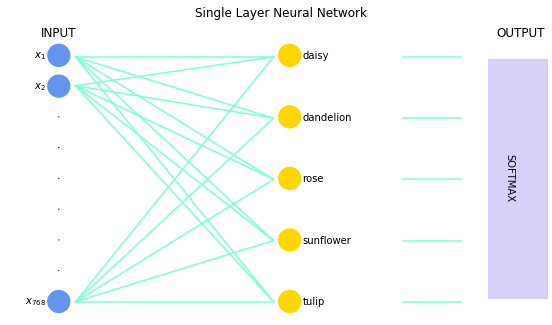

In [7]:
fig, axs = plt.subplots(9,5, figsize=(10,5))
fig.text(0.81,0.55,'SOFTMAX',rotation=-90)
axs[0,0].set_title('INPUT')
axs[0,4].set_title('OUTPUT')
fig.suptitle('Single Layer Neural Network')

# inputs
axs[0,0].pie([1], colors=['cornflowerblue'], radius=0.1, labels=['$x_1$'])
axs[0,0].axis('equal')
axs[1,0].pie([1], colors=['cornflowerblue'], radius=0.1, labels=['$x_2$'])
axs[1,0].axis('equal')
axs[8,0].pie([1], colors=['cornflowerblue'], radius=0.1, labels=['$x_{768}$'])
axs[8,0].axis('equal')
[axs[i,0].pie([1], colors=['black'], radius=0.06) for i in range(2,8)]

# weights
coordinates = [0.84, 0.67, 0.50, 0.33, 0.16]
[axs[i,1].pie([]) and axs[i,3].pie([]) and axs[i,4].pie([]) for i in range(0,9)]
fig.lines.extend([lines.Line2D([0.215,0.49],[j,i],transform=fig.transFigure,figure=fig,color='aquamarine')for i in coordinates for j in [0.84, 0.76, 0.16]])
fig.lines.extend([lines.Line2D([0.67,0.75],[i,i],transform=fig.transFigure,figure=fig, color='aquamarine')for i in coordinates])
fig.lines.extend([lines.Line2D([0.83,0.83],[0.25,0.75],transform=fig.transFigure,figure=fig,alpha=0.3,lw=60, color='mediumslateblue')])

# outputs
flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
[axs[i*2,2].pie([1], colors=['gold'], radius=0.1, labels=[flowers[i]], startangle=180) and axs[i*2,2].axis('equal') for i in range(5)]
[axs[i,2].pie([]) for i in range(1,9,2)]

plt.show()

### APPROACH
### Input Normalization
Every vector is normalized to between 0 and 1 using: $$z_i = \frac{x_i - min(x)}{max(x)-min(x)}$$

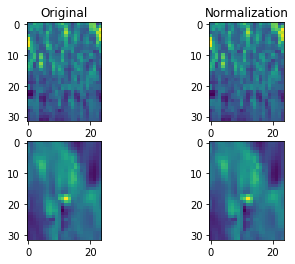

In [8]:
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(X_train[0].reshape(32,24))
axs[1,0].imshow(X_train[1].reshape(32,24))

# normalize image values
X_train /= 255
X_test /= 255

train_data = [(x,y) for x,y in zip([arr.reshape(768,1) for arr in X_train], y_train)]
test_data = [(x,y) for x,y in zip([arr.reshape(768,1) for arr in X_test], y_test)]
axs[0,1].imshow(X_train[0].reshape(32,24))
axs[1,1].imshow(X_train[1].reshape(32,24))
axs[0,0].set_title('Original')
axs[0,1].set_title('Normalization')
plt.show()

### Implementing Neural Network

<b>Parameters to consider:</b>
- Number of hidden layers (0 for single layer)
- Number of units in hidden layer(s)
- Activation Function
- Loss/Cost/Objective Function
- Batch size
- Learning rate
- Epoch

The biases and weights in the Network object are all initialized randomly, using the Numpy np.random.randn function to generate Gaussian distributions with mean 0 and standard deviation 1.

In [81]:
class NN(object):

    def __init__(self, sizes, cost, activation):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.cost = cost
        self.activation = activation
        # self.biases.shape (1, 5, 1)
        # self.weights.shape (1, 5, 768)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.mean_error = []
        self.learning_rate = 0.01
        self.num_epochs = 100
        self.batch_size = 16

    # ACTIVATION FUNCTIONS
    class Sigmoid(object):
        f = lambda x: 1. / (1. + np.exp(-x))
        prime = lambda x: NN.Sigmoid.f(x) * (1 - NN.Sigmoid.f(x))

    class ReLU(object):
        f = lambda x: np.maximum(x, 0)
        prime = lambda x: x > 0

    class tanh(object):
        f = lambda x: np.tanh(x)
        prime = lambda x: 1 - np.tanh(x) * np.tanh(x)

    class Softmax(object):
        f = lambda x: np.exp(x - np.max(x)) / np.exp(x - np.max(x)).sum(axis=0)
        prime = lambda x: 1
    # COST FUNCTIONS
    class QuadraticCost(object):
        f = lambda y, y_target: 0.5 * np.linalg.norm(y - y_target) ** 2
        delta = lambda z, y, y_target: (y - y_target)

    class CrossEntropyCost(object):
        f = lambda y, y_target: -np.sum(np.nan_to_num(-y_target * np.log(y) - (1 - y_target) * np.log(1 - y)))
        delta = lambda z, y, y_target: (y - y_target)

    def feedforward(self, x):
        activations = [x]
        for w in self.weights:
            z = np.dot(w, activations[-1])
            activations.append(self.activation.f(z))
        return NN.Softmax.f(z)

    def train(self, training_data, num_epochs, batch_size, learning_rate):
        self.mean_error = []
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        n = len(training_data)
        for j in range(num_epochs+1):
            self.mean_error.append([])
            random.shuffle(training_data)
            batches = [training_data[k:k + batch_size] for  k in range(0, n, batch_size)]
            for batch in batches:
                # nabla_b.shape (1, 5, 1)
                # nabla_w.shape (1, 5, 768)
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                etotal_batch = []
                for x, y in batch:
                    delta_nabla_b, delta_nabla_w, etotal = self.backprop(x, y)
                    etotal_batch.append(etotal)
                    nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                    nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                self.weights = [w - (learning_rate * nw / len(batch)) for w, nw in zip(self.weights, nabla_w)]
                self.biases = [b - (learning_rate * nb / len(batch)) for b, nb in zip(self.biases, nabla_b)]
                self.mean_error[-1].append(-np.mean(etotal_batch))
            self.mean_error[-1] = np.mean(self.mean_error[-1])
            if j!=0 and j % 100 == 0:
                print("Epoch", j, "complete")

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activations = [x]
        weighted_sum = []
        for b, w in zip(self.biases, self.weights):
            # w.shape (5,768)
            # x.shape (768,1)
            # b.shape (5,1)
            # z.shape (5,1)
            z = np.dot(w, activations[-1]) + b
            weighted_sum.append(z)
            activations.append((self.activation).f(z))
        # backward pass
        delta = (self.cost).delta(weighted_sum[-1], NN.Softmax.f(activations[-1]), y)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * (self.activation).prime(weighted_sum[-l])
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w, self.cost.f(NN.Softmax.f(activations[-1]),y))

    def test(self, test_data):
        return [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]

    def plot_error(self):
        plt.plot(self.mean_error)
        plt.title("Train Error Per Epoch")
        plt.show()
    
    def plot_parameters(self):
        fig, axs = plt.subplots(1,5, figsize=(10,3))
        axs[0].imshow(self.weights[0][0].reshape(32,24))
        axs[1].imshow(self.weights[0][1].reshape(32,24))
        axs[2].imshow(self.weights[0][2].reshape(32,24))
        axs[3].imshow(self.weights[0][3].reshape(32,24))
        axs[4].imshow(self.weights[0][4].reshape(32,24))
        
        axs[0].set_title('Daisy')
        axs[1].set_title('Dandelion')
        axs[2].set_title('Rose')
        axs[3].set_title('Sunflower')
        axs[4].set_title('Tulip')

        plt.show()
    
    def save(self, filename):
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "mean_error": self.mean_error,
                "num_epochs": self.num_epochs,
                "batch_size": self.batch_size,
                "learning_rate": self.learning_rate,
                "cost": str(self.cost.__name__),
                "activation": str(self.activation.__name__)
                }
        f = open(filename, "w")
        json.dump(data, f)
        
    def toString(self):
        print("""LOSS = {0}
ACTIVATION = {1}
HIDDEN_LAYER = {2}
LEARNING_RATE = {3}
NUM_EPOCHS = {4}
BATCH_SIZE = {5}""".format(str(self.cost.__name__), str(self.activation.__name__), self.sizes, self.learning_rate, self.num_epochs, self.batch_size))

In [82]:
from sklearn.metrics import confusion_matrix
import itertools
def conf_mat(y_test, y_pred, cmap='viridis'):
    class_names = [0,1,2,3,4]

    cnf_matrix = confusion_matrix(y_test, y_pred,labels=class_names)
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(class_names))
    fmt = '.2f'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),horizontalalignment="center",color="white" if cnf_matrix[i, j] > thresh else "black")
        
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

    plt.colorbar(fraction=0.045)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90, fontsize=15)
    plt.yticks(tick_marks, class_names, fontsize=15)

    plt.tight_layout()
    plt.show()

## Experiments on Single Layer
### Batch Size
Batch size is important in order to prevent updating weights at each image. A bumpy train error plot would occur in the case of a small batch size.

In [84]:
LOSS = NN.CrossEntropyCost
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 1

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 1
Test Error =  0.2839335180055402


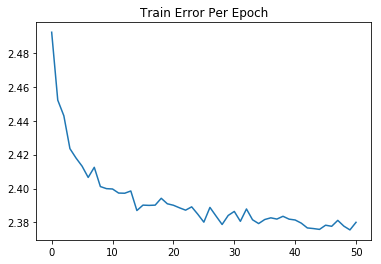

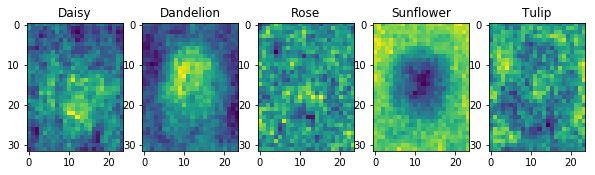

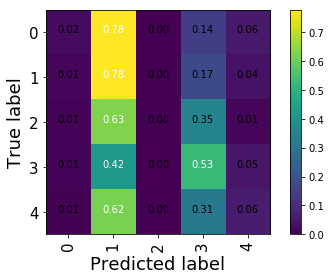

Wall time: 23.9 s


In [85]:
%%time
ACTIVATION = NN.Sigmoid
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

However an appropriate approach would be to have an average batch size.

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 32
Test Error =  0.29916897506925205


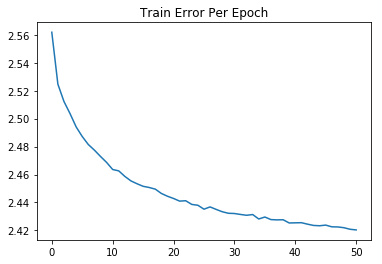

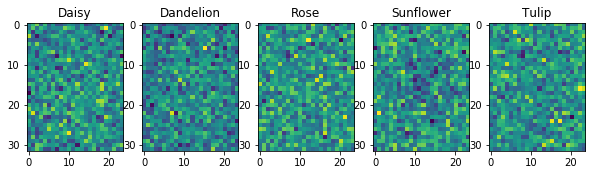

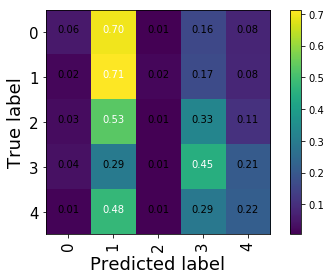

Wall time: 16.1 s


In [91]:
%%time
BATCH_SIZE = 32
ACTIVATION = NN.Sigmoid
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

### Learning Rate
When we keep learning rate very high we are having a bumpy train error plot. Visualization of the parameters are very sharp.

In [96]:
LOSS = NN.CrossEntropyCost
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 5
NUM_EPOCHS = 50
BATCH_SIZE = 16

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 5
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.27977839335180055


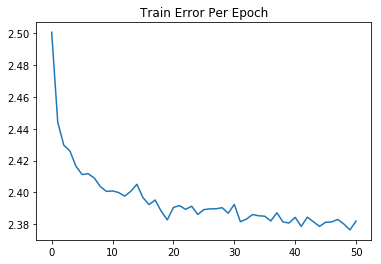

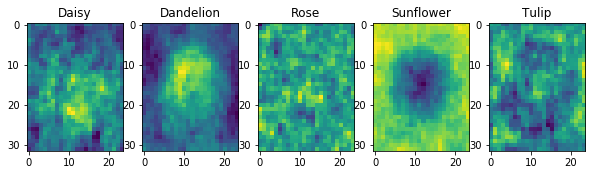

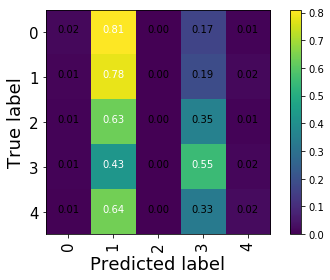

Wall time: 17.5 s


In [97]:
%%time
ACTIVATION = NN.Sigmoid
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

When we keep learning rate really low we are having a smooth train error plot. We will need more epochs to converge to minimum. And visualization of the parameters is expected.

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.001
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.23407202216066483


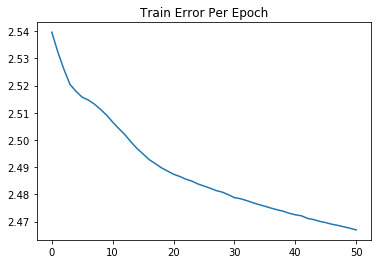

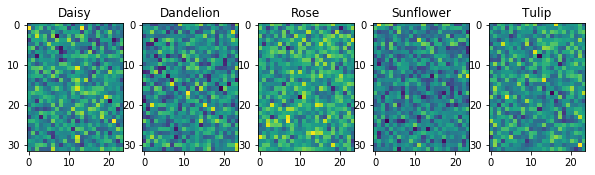

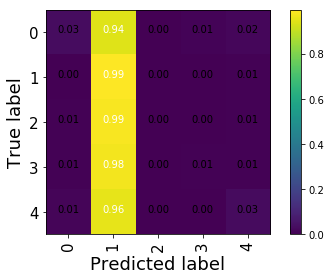

Wall time: 17.1 s


In [98]:
%%time
LEARNING_RATE = 0.001
ACTIVATION = NN.Sigmoid
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

An approximate learning rate would be more suitable choice.

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.28254847645429365


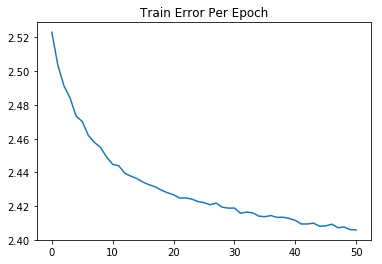

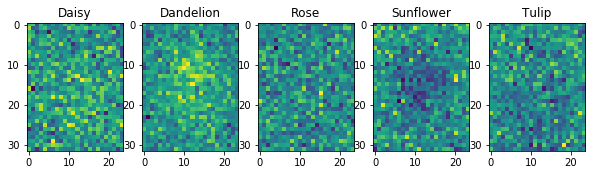

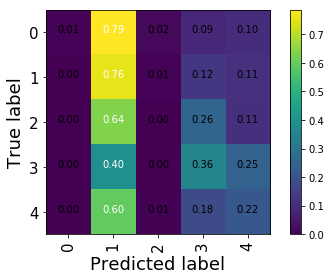

Wall time: 17.7 s


In [99]:
%%time
LEARNING_RATE = 0.01
ACTIVATION = NN.Sigmoid
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

### Activation Functions
#### RELU
If ReLU is used as an activation function we will need more epochs to converge to wanted minimum.

LOSS = CrossEntropyCost
ACTIVATION = ReLU
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.23407202216066483


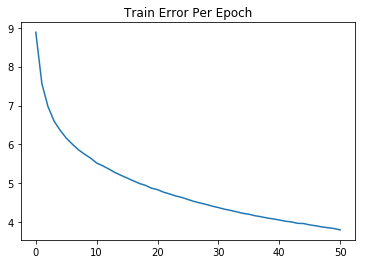

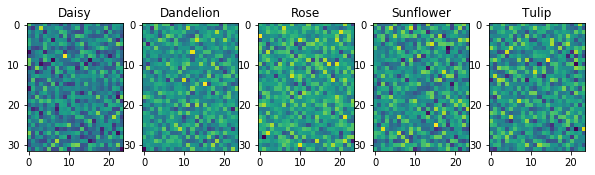

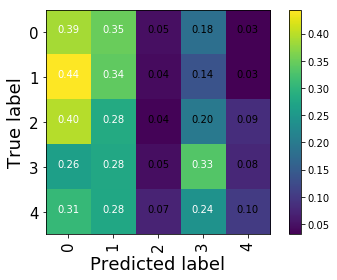

Wall time: 17.3 s


In [117]:
%%time
LOSS = NN.CrossEntropyCost
HIDDEN_LAYER = [768, 5]
NUM_EPOCHS = 50
BATCH_SIZE = 16
LEARNING_RATE = 0.01
ACTIVATION = NN.ReLU
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

Epoch 100 complete
LOSS = CrossEntropyCost
ACTIVATION = ReLU
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 150
BATCH_SIZE = 16
Test Error =  0.2673130193905817


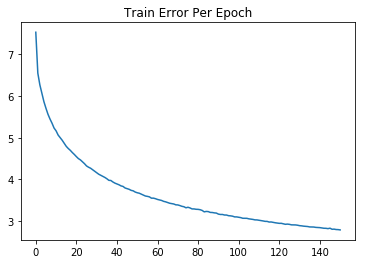

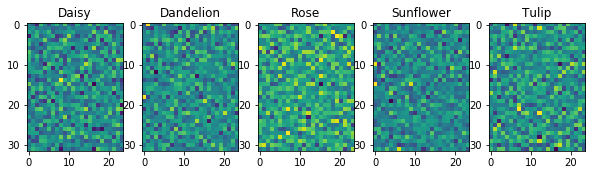

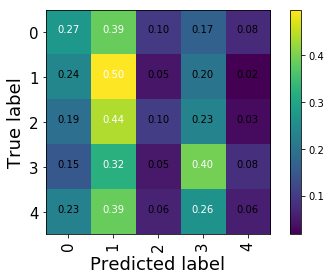

Wall time: 2min 1s


In [87]:
%%time
LOSS = NN.CrossEntropyCost
HIDDEN_LAYER = [768, 5]
NUM_EPOCHS = 200
BATCH_SIZE = 16
LEARNING_RATE = 0.1
ACTIVATION = NN.ReLU
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

#### TANH
Tanh function as activation function converges to minimum a lot faster.

LOSS = CrossEntropyCost
ACTIVATION = tanh
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.29916897506925205


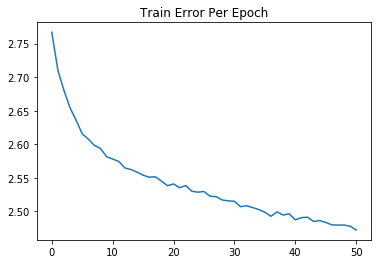

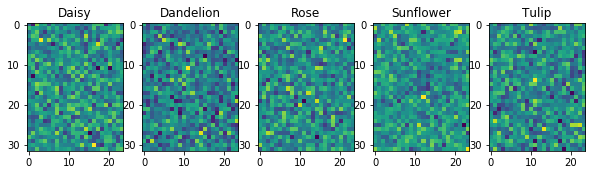

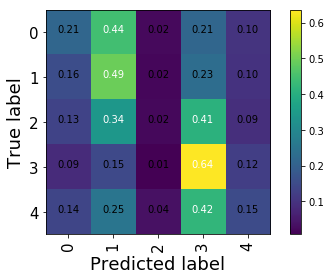

Wall time: 15.9 s


In [118]:
%%time
LOSS = NN.CrossEntropyCost
HIDDEN_LAYER = [768, 5]
NUM_EPOCHS = 50
BATCH_SIZE = 16
LEARNING_RATE = 0.01
ACTIVATION = NN.tanh
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("0_cross_sigmoid.json")

## Experiments on Multi Layer Neural Network
In the case of multi layer neural network, the default settings of single layer is not enough since it will need more time converge to minimum - epoch is increased.
Number of units in hidden layers is decided when testing. Appropriate choice for the multi layer is to have a fully connected layer at the end. Since neural networks always gets the almost same accuracy, sources for testing is not enough.

In [89]:
LOSS = NN.CrossEntropyCost
ACTIVATION = NN.Sigmoid
HIDDEN_LAYER = [768, 10, 5]

Epoch 100 complete
LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 10, 5, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 150
BATCH_SIZE = 16
Test Error =  0.28116343490304707


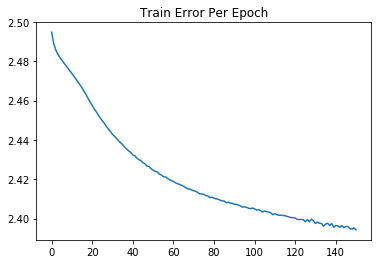

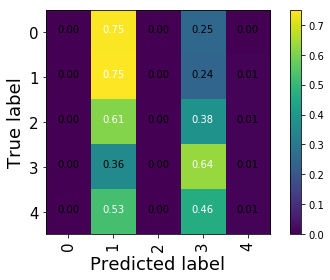

In [112]:
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("10_5_cross_sigmoid.json")

If we are to increase epoch size we will converge better.

We can observe the same effect on 2 hidden layers.

Epoch 100 complete
Epoch 200 complete
LOSS = CrossEntropyCost
ACTIVATION = tanh
HIDDEN_LAYER = [768, 10, 5, 5]
LEARNING_RATE = 0.01
NUM_EPOCHS = 250
BATCH_SIZE = 16
Test Error =  0.25069252077562326


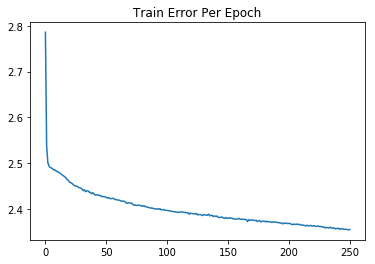

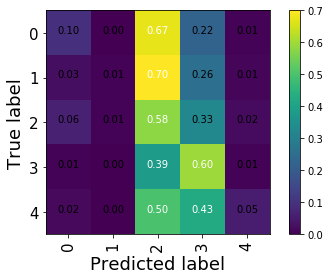

In [119]:
NUM_EPOCHS = 250
HIDDEN_LAYER = [768,10,5,5]
nn = NN(HIDDEN_LAYER, LOSS, ACTIVATION)
nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])
nn.save("10_5_5_cross_sigmoid.json")

### Test

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0
NUM_EPOCHS = 50
BATCH_SIZE = 16
Test Error =  0.28254847645429365


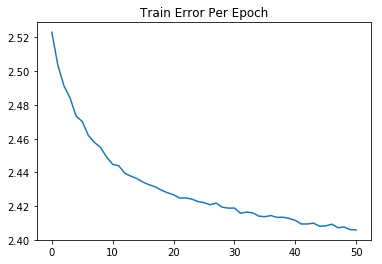

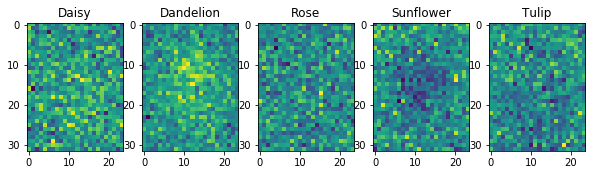

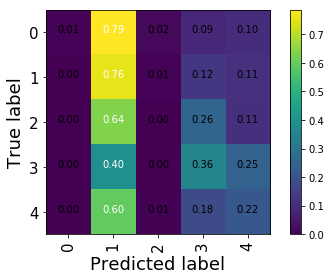

In [113]:
# Please enter model to test
f = open("0_cross_sigmoid.json", "r")

data = json.load(f)
nn = NN(data["sizes"], getattr(NN, data["cost"]), getattr(NN, data["activation"]))
nn.weights = [np.array(w) for w in data["weights"]]
nn.biases = [np.array(b) for b in data["biases"]]
nn.learning_rate =  int(data["learning_rate"])
nn.batch_size = int(data["batch_size"])
nn.num_epochs = int(data["num_epochs"])
nn.mean_error = data["mean_error"]
nn.toString()
y_pred = nn.test(test_data)
print("Test Error = ", sum(int(x == y) for (x, y) in y_pred) / len(test_data))
nn.plot_error()
nn.plot_parameters()
conf_mat([y for x,y in y_pred],[x for x,y in y_pred])

### Visualization of Parameters

LOSS = CrossEntropyCost
ACTIVATION = Sigmoid
HIDDEN_LAYER = [768, 5]
LEARNING_RATE = 0.05
NUM_EPOCHS = 10
BATCH_SIZE = 16


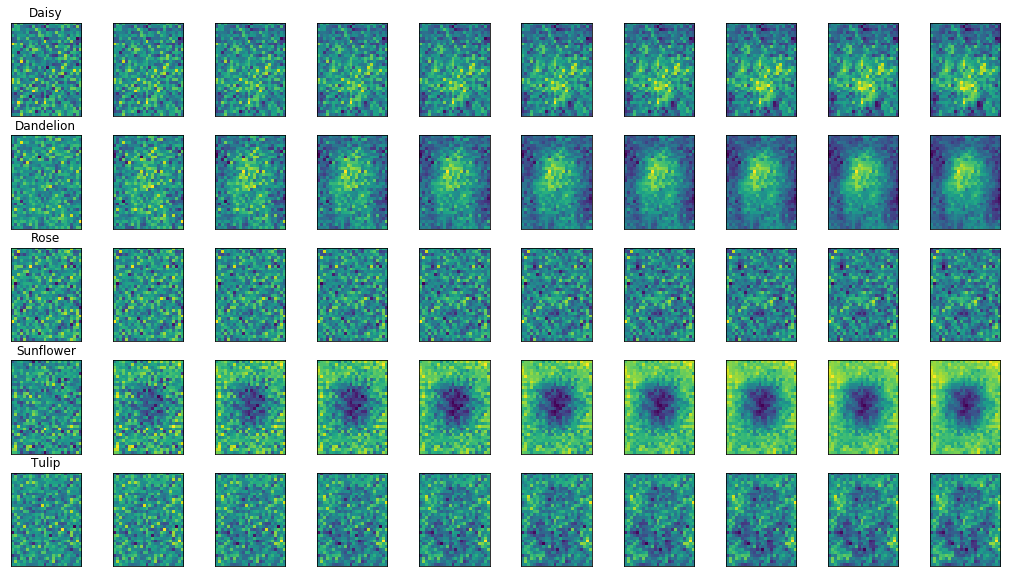

In [114]:
fig, axs = plt.subplots(5,10, figsize=(18,10))
[ax.set(xticks=[], yticks=[]) for ax in axs.flat]

axs[0][0].set_title('Daisy')
axs[1][0].set_title('Dandelion')
axs[2][0].set_title('Rose')
axs[3][0].set_title('Sunflower')
axs[4][0].set_title('Tulip')

nn = NN([768, 5], NN.CrossEntropyCost, NN.Sigmoid)

LEARNING_RATE = 0.05
NUM_EPOCHS = 10
BATCH_SIZE = 16

nn.learning_rate = LEARNING_RATE
nn.batch_size = BATCH_SIZE
nn.num_epochs = NUM_EPOCHS

nn.toString()

for i in range(0,10):
    axs[0][i].imshow(nn.weights[0][0].reshape(32,24))
    axs[1][i].imshow(nn.weights[0][1].reshape(32,24))
    axs[2][i].imshow(nn.weights[0][2].reshape(32,24))
    axs[3][i].imshow(nn.weights[0][3].reshape(32,24))
    axs[4][i].imshow(nn.weights[0][4].reshape(32,24))
    nn.train(train_data, NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE)
plt.show()

### RESULTS AND CONCLUSION

In this work two neural networks are implemented: Single Layer Neural Network and Multi Layer Neural Network on the subject of recognition flowers from images. Implementing neural network from scratch was a though work, (i)choosing the right functions, (ii)fitting hyper-parameters, (iii)visualizing parameters and (iv)observing training and test error discussed. While neural network appears to correctly classify some flowers, overall it did a bad job. In the end a neural network implemented and discussed.

### REFERENCES
[1] https://www.kaggle.com/alxmamaev/flowers-recognition/downloads/flowers.zip/1 <br>
[2] http://neuralnetworksanddeeplearning.com/<br>
[3] https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220<br>
[4] https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/<br>